### Полиномиальные модели

1. В выполненной работе добавьте замер времени обучения каждой модели.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

In [3]:
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [4]:
X = data.x
y = data.y
X.shape

(100,)

Text(0, 0.5, 'Целевая переменная')

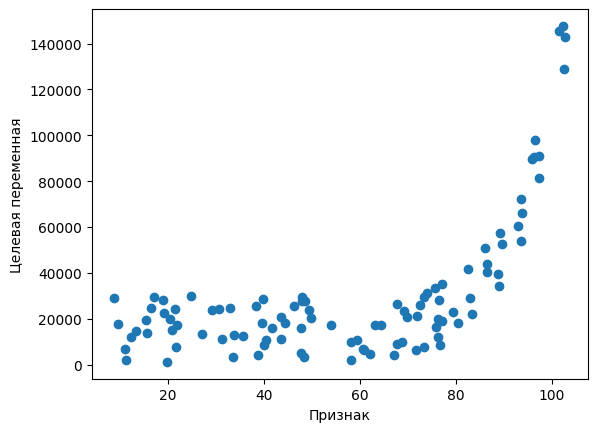

In [ ]:
plt.scatter(X, y)
plt.xlabel('Признак')
plt.ylabel('Целевая переменная')

Заметим, что на графике нет линейной зависимости между атрибутом и целевой переменной

In [5]:
X = pd.DataFrame(X)

Необходимо преобразовать Х из Series в DataFrame, т к sklearn работает с матрицами

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
start = time.perf_counter()
linear = LinearRegression().fit(X, y) #Инициализация и обучение модели линейной регрессии
t_lin_1 = time.perf_counter() - start
print(f'Время обучения модели: {t_lin_1:.6f} sec')

Время обучения модели: 0.023002 sec


perf_counter() измеряет время в секундах с некоторого неопределенного момента времени

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


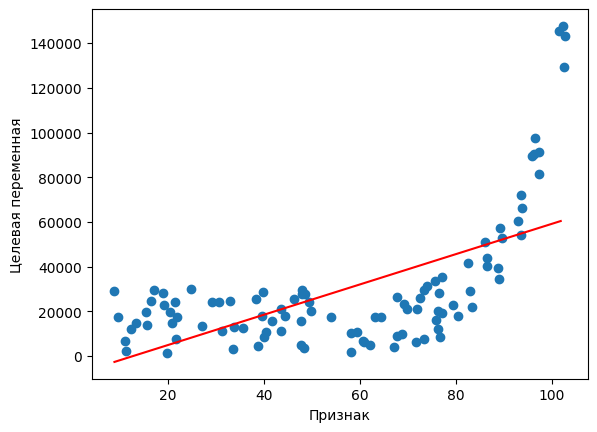

In [14]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')
plt.xlabel('Признак')
plt.ylabel('Целевая переменная')
s_lin = linear.score(X, y)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

Создаем отдельный объект, для трансформации данных:

In [9]:
transformation = PolynomialFeatures(degree=2)

In [10]:
transformation.fit(X)

PolynomialFeatures()

In [11]:
X_2 = transformation.transform(X)
X_2.shape
X_2[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

In [12]:
start = time.perf_counter()
poly_2d = LinearRegression().fit(X_2, y)
t_poly_1 = time.perf_counter() - start
print(f'Время обучения модели: {t_poly_1:.6f} sec')

Время обучения модели: 0.012964 sec


In [15]:
xx_2d = transformation.transform(pd.DataFrame(xx))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


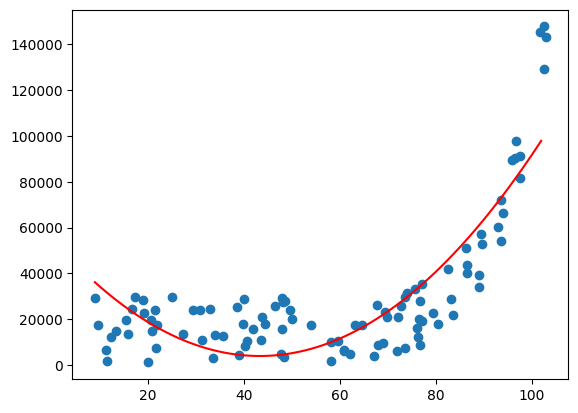

In [ ]:
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [16]:
s_poly1 = poly_2d.score(X_2, y)

In [17]:
data_1 = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

In [18]:
y_1 = data_1.y
X_1 = data_1.drop(["y"], axis=1)

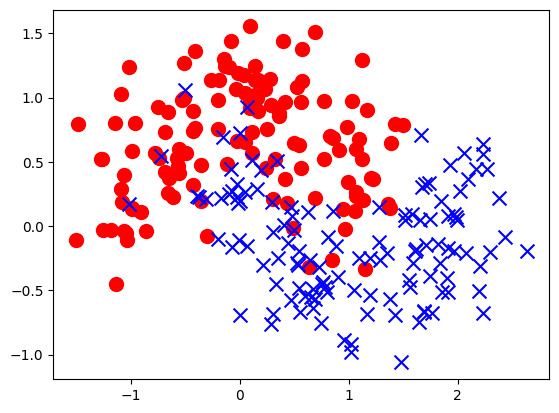

In [ ]:
plt.scatter(X_1.iloc[:, 0][y_1==0], X_1.iloc[:, 1][y_1==0], marker="o", c='r', s=100)
plt.scatter(X_1.iloc[:, 0][y_1==1], X_1.iloc[:, 1][y_1==1], marker="x", c='b', s=100)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
start = time.perf_counter()
logistic = LogisticRegression().fit(X_1, y_1)
t_log_1 = time.perf_counter() - start
print(f'Время обучения модели: {t_log_1:.6f} sec')

Время обучения модели: 0.009887 sec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


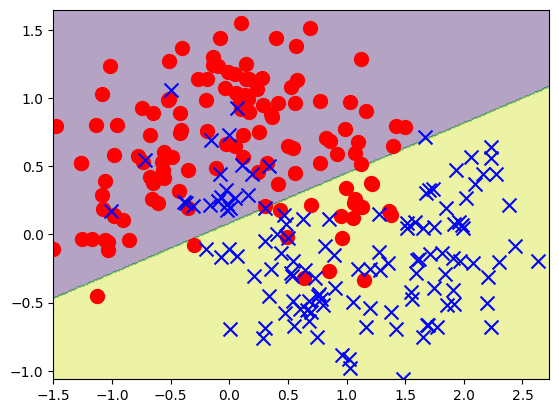

In [26]:
xx, yy = np.meshgrid(
    np.arange(X_1.min()[0], X_1.max()[0]+0.1, 0.01),
    np.arange(X_1.min()[1], X_1.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_1.iloc[:, 0][y_1==0], X_1.iloc[:, 1][y_1==0], marker="o", c='r', s=100)
plt.scatter(X_1.iloc[:, 0][y_1==1], X_1.iloc[:, 1][y_1==1], marker="x", c='b', s=100)

In [21]:
s_log = logistic.score(X_1, y_1)

In [22]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X_1)

In [ ]:
X_3.shape

(250, 9)

In [ ]:
start = time.perf_counter()
class_3 = LogisticRegression().fit(X_3, y_1)
t_poly_2 = time.perf_counter() - start
s_poly2 = class_3.score(X_3, y_1)
print(f'Время обучения модели: {t_poly_2:.6f} sec')
print(f'Коэффициент детерминации: {s_poly2:.3f}')

Время обучения модели: 0.019007 sec
Коэффициент детерминации: 0.900


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


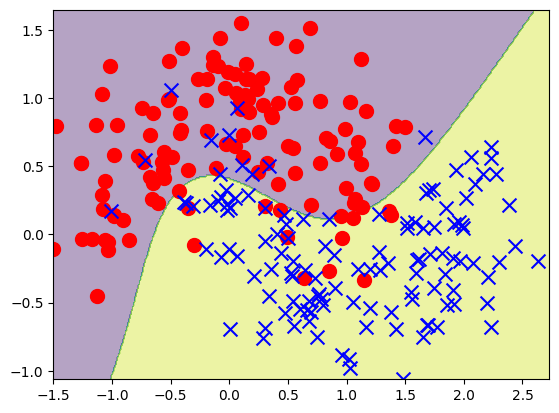

In [ ]:
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_1.iloc[:, 0][y_1==0], X_1.iloc[:, 1][y_1==0], marker="o", c='r', s=100)
plt.scatter(X_1.iloc[:, 0][y_1==1], X_1.iloc[:, 1][y_1==1], marker="x", c='b', s=100)

2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

In [36]:
times_2 = []
scores_2 = []
degrees = [5, 10, 100]

for i in degrees:
  transformation_5 = PolynomialFeatures(degree=i)
  transformation_5.fit(X)
  X_i = transformation_5.transform(X)

  start = time.perf_counter()
  poly_id = LinearRegression().fit(X_i, y)
  t = time.perf_counter() - start

  score_poly = poly_id.score(X_i, y)
  times_2.append(t)
  scores_2.append(score_poly)

  print(f'Время обучения модели полинома {i}-ой степени: {t:.6f} sec')
  print(f'Коэффициент детерминации: {score_poly:.3f}')


table_2 = pd.DataFrame({"Название датасета": ["gen_regression" for _ in range(len(degrees))],
               'Регрессия': ['Полиномиальная' for _ in range(len(degrees))],
               'Время обучения' : times_2,
               'Коэффицент детерминации' : scores_2,
               'Степень полинома' : degrees})

Время обучения модели полинома 5-ой степени: 0.002322 sec
Коэффициент детерминации: 0.922
Время обучения модели полинома 10-ой степени: 0.002188 sec
Коэффициент детерминации: 0.923
Время обучения модели полинома 100-ой степени: 0.001882 sec
Коэффициент детерминации: 0.792


Вывод: В данном датасете небольшие изменения в значениии степени полинома практически не влияют на время обучения модели и ее эффективность. Использование полинома большИх степеней не гарантирует эффективную работу определенной модели и увеличивает время ее обучения.

3. То же самое проделайте с датасетом для классификации и "King county".

Время обучения модели с полиномом 5-ой степени: 0.008724 sec
Коэффициент детерминации: 0.916


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


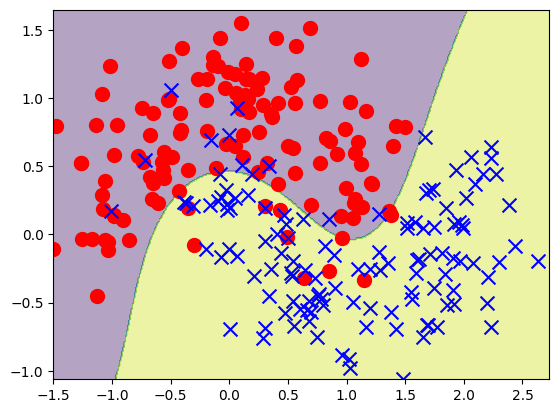

Время обучения модели с полиномом 10-ой степени: 0.021881 sec
Коэффициент детерминации: 0.924


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


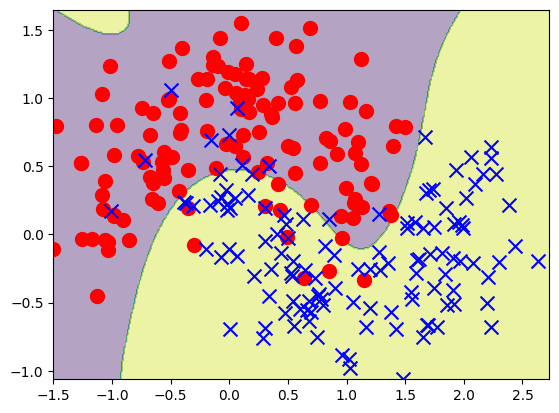

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Время обучения модели с полиномом 100-ой степени: 0.022064 sec
Коэффициент детерминации: 0.500


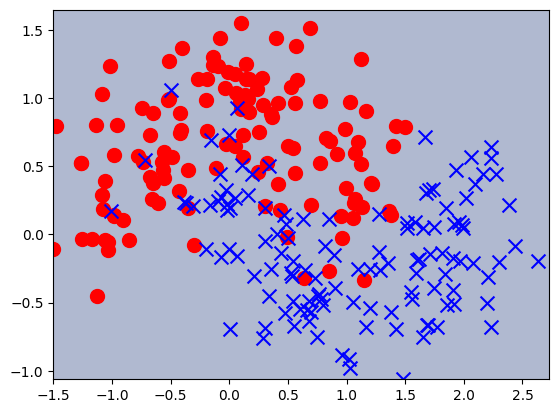

In [31]:
times_3 = []
scores_3 = []
degrees = [5, 10, 100]

for i in degrees:
    class_transform = PolynomialFeatures(degree=i, include_bias=False)
    X_i = class_transform.fit_transform(X_1)

    start = time.perf_counter()
    class_i = LogisticRegression().fit(X_i, y_1)
    r = time.perf_counter() - start

    score_poly = class_i.score(X_i, y_1)
    scores_3.append(score_poly)
    times_3.append(r)
    print(f'Время обучения модели с полиномом {i}-ой степени: {r:.6f} sec')
    print(f'Коэффициент детерминации: {score_poly:.3f}')

    Z = class_i.predict(class_transform.transform(XX)).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_1.iloc[:, 0][y_1==0], X_1.iloc[:, 1][y_1==0], marker="o", c='r', s=100)
    plt.scatter(X_1.iloc[:, 0][y_1==1], X_1.iloc[:, 1][y_1==1], marker="x", c='b', s=100)
    plt.show()

table_3 = pd.DataFrame({"Название датасета": ['gen_classification'for _ in range(len(degrees))],
               'Регрессия': ['Полиномиальная' for _ in range(len(degrees))],
               'Время обучения' : times_3,
               'Коэффицент детерминации' : scores_3,
               'Степень полинома' : degrees})

In [ ]:
data_house = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
y_house = data_house.price
X_house = data_house.drop(['id', 'date', 'price'], axis=1)

In [ ]:
X_house.shape, y_house.shape

((21613, 18), (21613,))

In [ ]:
poly_features_house = PolynomialFeatures(degree=4) #?
X_i = poly_features_house.fit_transform(X_house)

start = time.perf_counter()
poly_house = LinearRegression().fit(X_i, y_house)
t_house = time.perf_counter() - start

score_house = poly_house.score(X_i, y_house)

print(f'Время обучения модели с полиномом 4-ой степени: {t_house:.6f} sec')
print(f'Коэффициент детерминации: {score_house:.3f}')

Время обучения модели с полиномом 4-ой степени: 409.423877 sec
Коэффициент детерминации: 0.881


In [ ]:
poly_class_house = pd.DataFrame({"Название датасета": ['king_ country_ houses_aa'],
               'Регрессия': ['Полиномиальная'],
               'Время обучения' : t_house,
               'Коэффицент детерминации' : score_house,
               'Степень полинома' : [4]})

In [ ]:
X_i.shape

(250, 5150)

In [ ]:
start = time.perf_counter()
model_house = LinearRegression().fit(X_house, y_house)
t_house_class = time.perf_counter() - start

score_house_class = model_house.score(X_house, y_house)

In [ ]:
class_house = pd.DataFrame({"Название датасета": ['king_ country_ houses_aa'],
               'Регрессия': ['Логистическая'],
               'Время обучения' : t_house_class,
               'Коэффицент детерминации' : score_house_class,
               'Степень полинома' : [float('nan')]})

4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

In [ ]:
table = pd.DataFrame(columns=["Название датасета", 'Регрессия', 'Время обучения', 'Коэффицент детерминации', 'Степень полинома'])
table['Регрессия'] = ['Линейная', 'Полиномиальная', "Логистическая", "Полиномиальная"]
table['Время обучения'] = [t_lin_1, t_poly_1, t_log_1, t_poly_2]
table['Коэффицент детерминации'] = [s_lin, s_poly1, s_log, s_poly2]
table['Степень полинома'] = [None, 2, None, 3]
table["Название датасета"] = ["gen_regression", "gen_regression", 'gen_classification', 'gen_classification']

In [ ]:
pd.concat([table, table_2, table_3, class_house, poly_class_house], axis=0)

,Название датасета,Регрессия,Время обучения,Коэффицент детерминации,Степень полинома
0,gen_regression,Линейная,0.039006,0.374674,NaN
1,gen_regression,Полиномиальная,0.029465,0.735975,2.0
2,gen_classification,Логистическая,0.017822,0.832000,NaN
3,gen_classification,Полиномиальная,0.009188,0.900000,3.0
0,gen_regression,Полиномиальная,0.002635,0.921748,5
1,gen_regression,Полиномиальная,0.007754,0.923200,10
2,gen_regression,Полиномиальная,0.012930,0.792462,100
0,gen_classification,Полиномиальная,0.010342,0.916000,5
1,gen_classification,Полиномиальная,0.020879,0.924000,10
2,gen_classification,Полиномиальная,0.084525,0.500000,100


При небольшом количестве признаков использование малых и средних значений степени полинома позволит приблизится к более эффективному результату обучения, при этом не увеличив время обучения. Трансформация данных в полином большой степени и обучение на них модели приводит к уменьшению эффективности ее работы.    

В случае большого множества признаков использование большой степени полинома нецелесообразно, т.к затрачивается большое количество аппартных и временнЫх ресусов, а эффективность работы либо изменяется незначительно, либо уменьшается.

5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [ ]:
_ = [print(*value) for value in sorted(zip(X_house.columns, model_house.coef_), key=lambda x: x[1], reverse=True)]

lat 602748.2264485636
waterfront 582960.4584234621
grade 95890.44515147626
view 52870.94238431031
bathrooms 41144.27853237157
condition 26385.649138592697
floors 6689.550115105011
sqft_living 110.44286457691003
sqft_above 70.78522435876927
sqft_basement 39.65763999343623
sqft_living15 21.68140046131072
yr_renovated 19.81258370916596
sqft_lot 0.1285978691263798
sqft_lot15 -0.3826418495445978
zipcode -582.4198656403075
yr_built -2620.2232112952365
bedrooms -35766.54144362941
long -214729.8282532986


Данные выведены в порядке убывания значений коэффицентов. По данным видно, что наибольшее влияние на цену дома оказывают его месторасположение и вид на береговоую линию.    
Можно заметить странное влияние кол-ва жилых комнат или площади дома на цену.

6. Попробуйте также проинтерпретировать полиномиальную модель

In [ ]:
len(poly_house.coef_)

7315

In [ ]:
poly_features = poly_features_house.get_feature_names_out(X_house.columns)
_ = [print(*value) for value in sorted(zip(poly_features, poly_house.coef_), key=lambda x: x[1], reverse=True)]

Выходные данные были обрезаны до нескольких последних строк (5000).
floors waterfront long sqft_living15 6.349156440771227e-09
waterfront yr_built^2 long 6.332220870404125e-09
bathrooms floors condition sqft_lot15 6.332045792710071e-09
waterfront grade sqft_basement long 6.304414223351886e-09
sqft_living^2 zipcode^2 6.30029556380291e-09
waterfront sqft_basement lat sqft_living15 6.2877467431989526e-09
sqft_basement yr_renovated sqft_living15 sqft_lot15 6.2332492414355336e-09
waterfront condition grade zipcode 6.229975198062608e-09
bathrooms view grade sqft_lot15 6.220835960286497e-09
bathrooms sqft_lot lat long 6.218554705170616e-09
floors view zipcode long 6.179557003942866e-09
grade^3 sqft_above 6.179483025527079e-09
sqft_living floors view^2 6.17760280691833e-09
sqft_lot waterfront view condition 6.170016256847288e-09
floors sqft_basement long sqft_living15 6.139424084603384e-09
bedrooms sqft_living floors condition 6.095967293262137e-09
lat^2 long sqft_living15 6.084058609598669e-0